# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ["Signal","Density"]

**Visualisation**

<Axes: xlabel='Signal', ylabel='Density'>

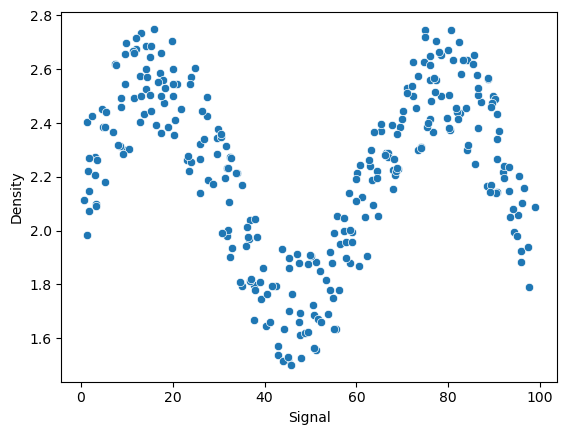

In [5]:
sns.scatterplot(x="Signal",y="Density",data=df)

### Models Explored:
- Linear Regression
- Polynomial Regression
- KNN Regression
- Decision Tree Regression
- Support Vector Regression
- Random Forest Regression
- Boosted Trees Regression

## Linear Regression

In [6]:
X = df['Signal'].values.reshape(-1,1)

In [7]:
y = df["Density"]

In [8]:
from sklearn. model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linear_model = LinearRegression()

In [12]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [13]:
lr_preds = linear_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
mean_absolute_error(y_test, lr_preds)

0.21119897331863297

In [16]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [17]:
signal_range = np.arange(0,100)

In [18]:
signal_preds = linear_model.predict(signal_range.reshape(-1,1))

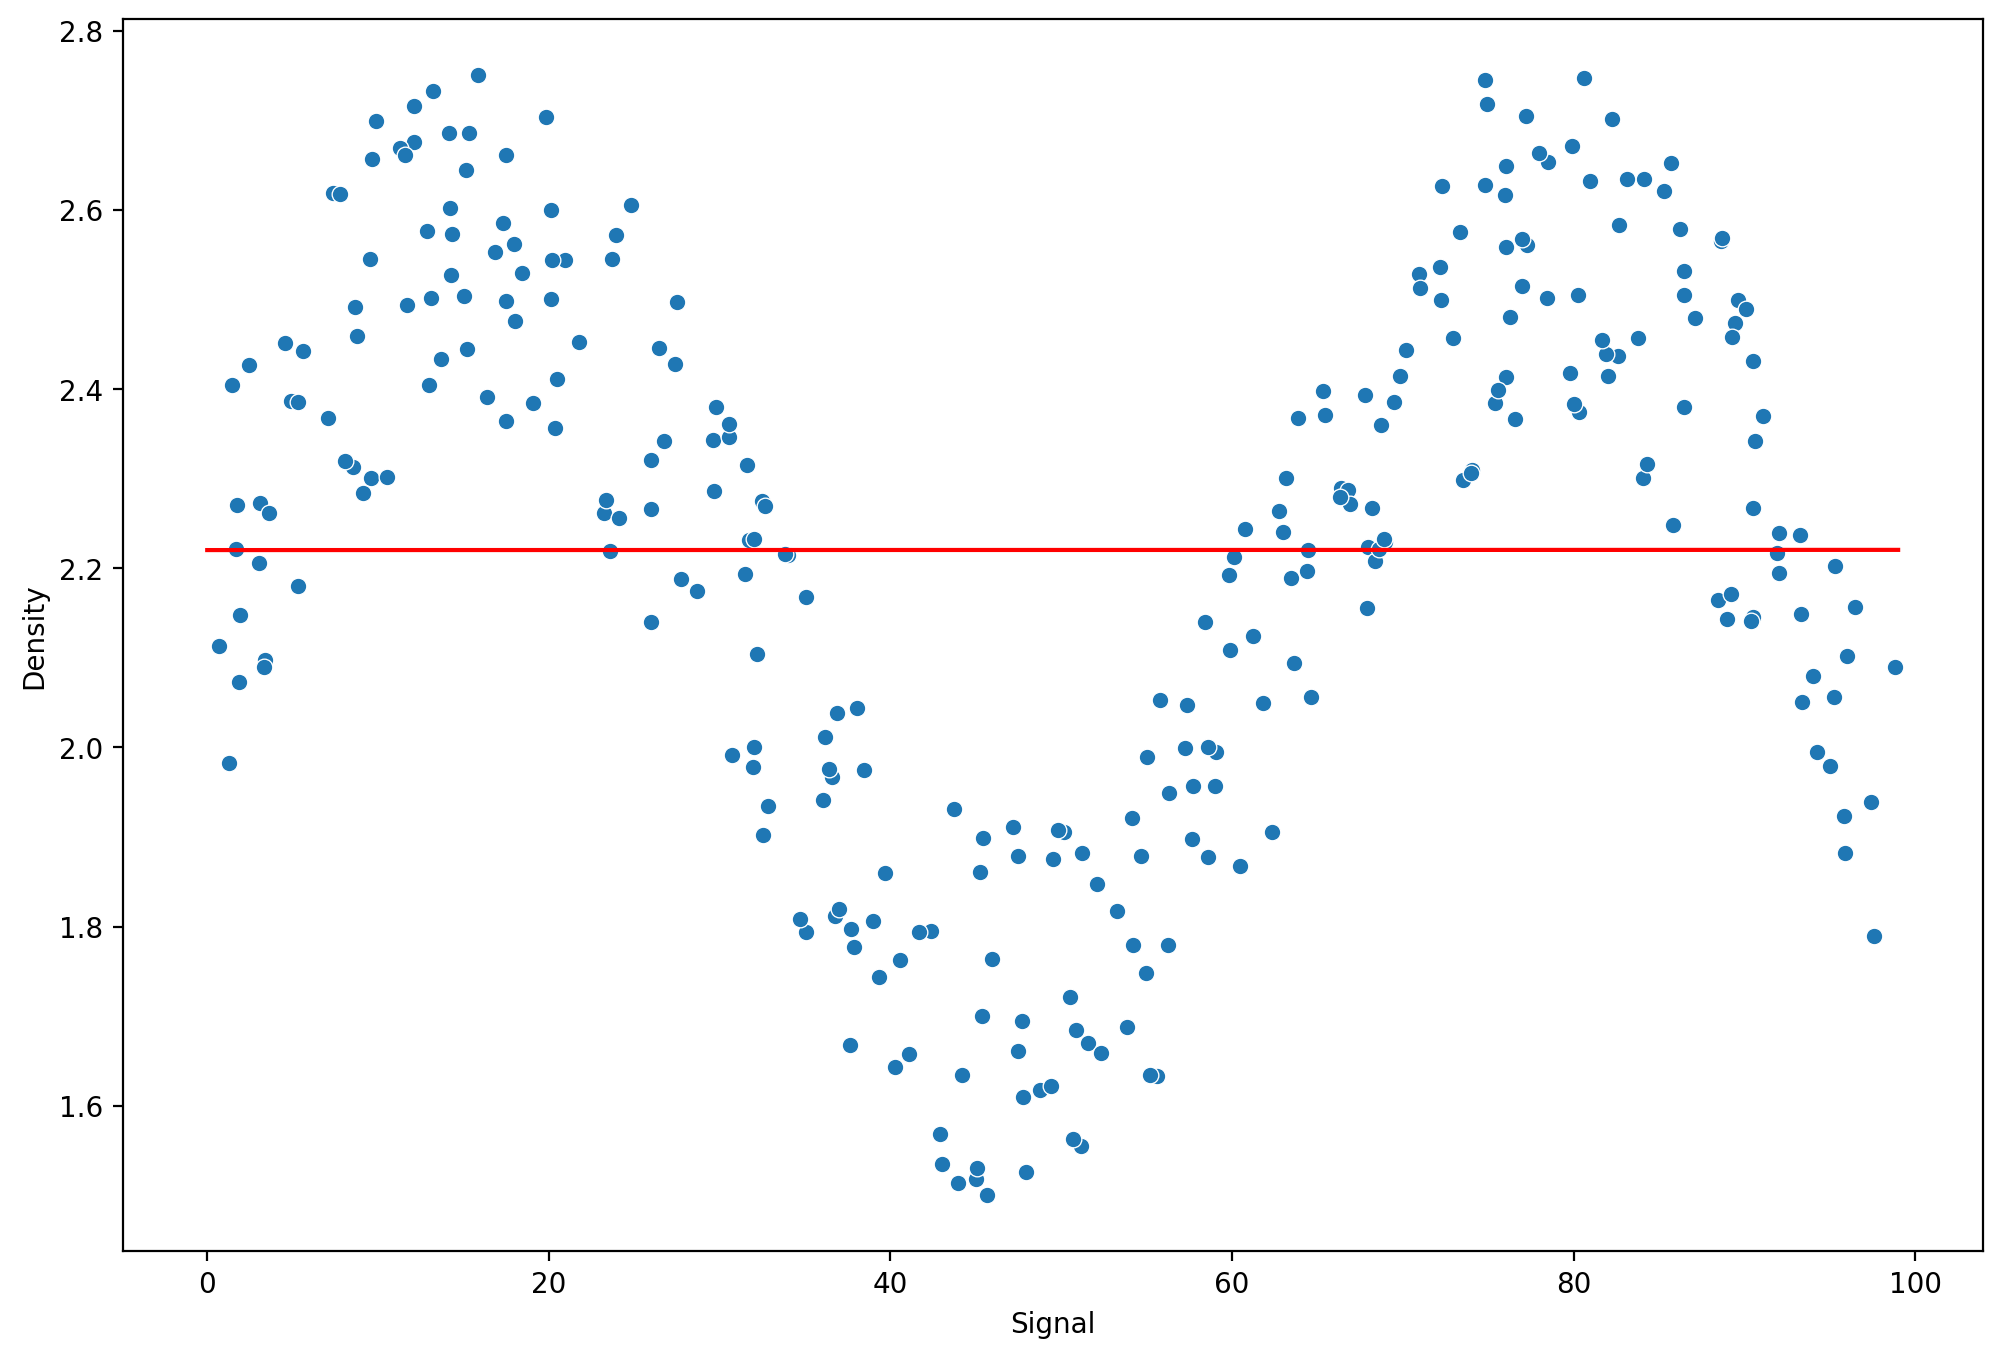

In [19]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x="Signal",y="Density",data=df)
plt.plot(signal_range,signal_preds, color='red');

## Polynomial Regression

### Attempting with a Polynomial Regression Model

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

#### Function to Help Run Models

In [20]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'MAE : {mae}')
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df)
    plt.plot(signal_range,output,color='red')

#### Pipeline for Poly Orders

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [22]:
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

MAE : 0.2290310544351147
RMSE : 0.28173095637256484


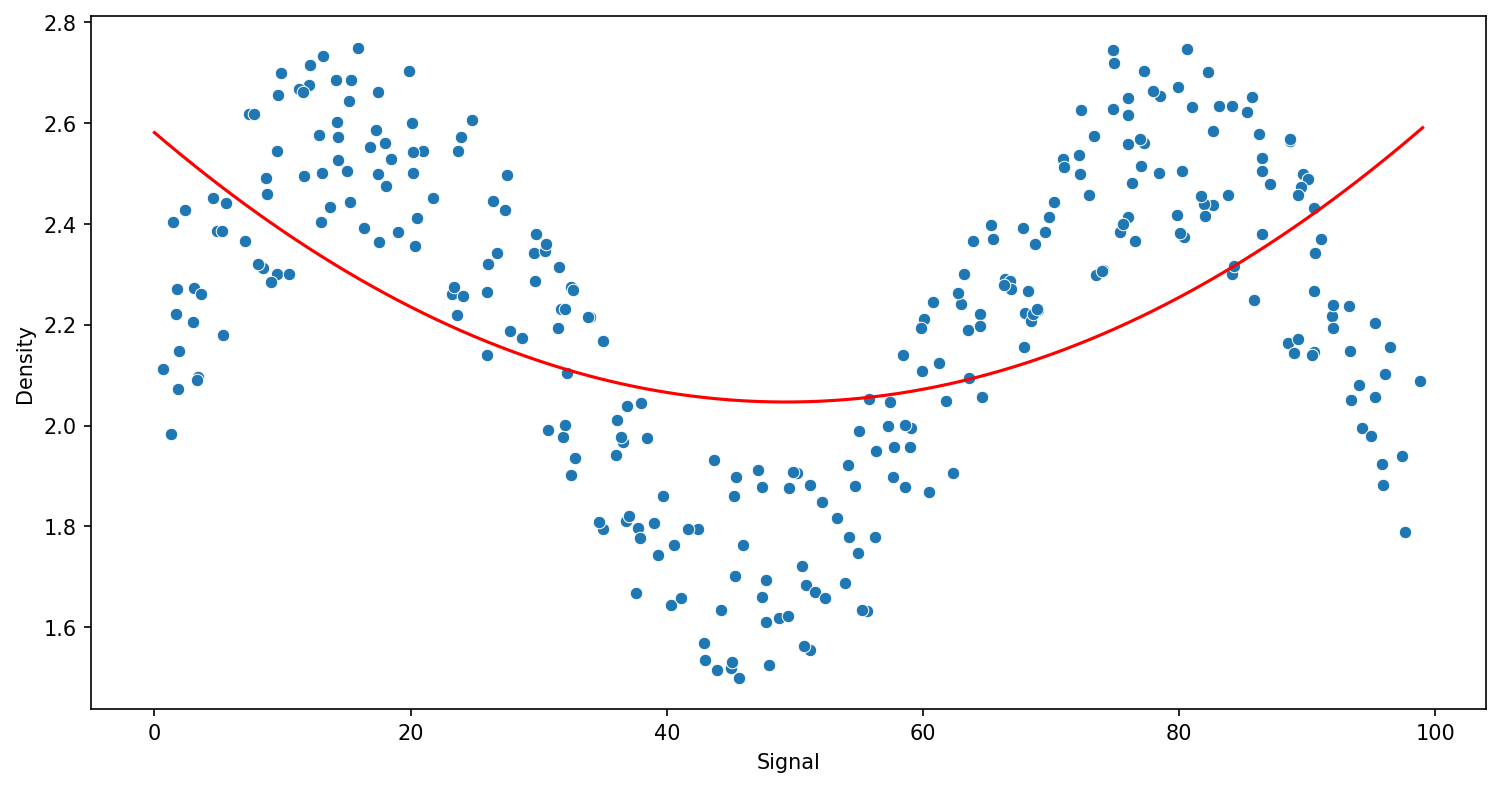

In [23]:
run_model(pipe,X_train,y_train,X_test,y_test)

#### Comparing Various Polynomial Orders

In [24]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE : 0.11969122677298843
RMSE : 0.13807440138999358


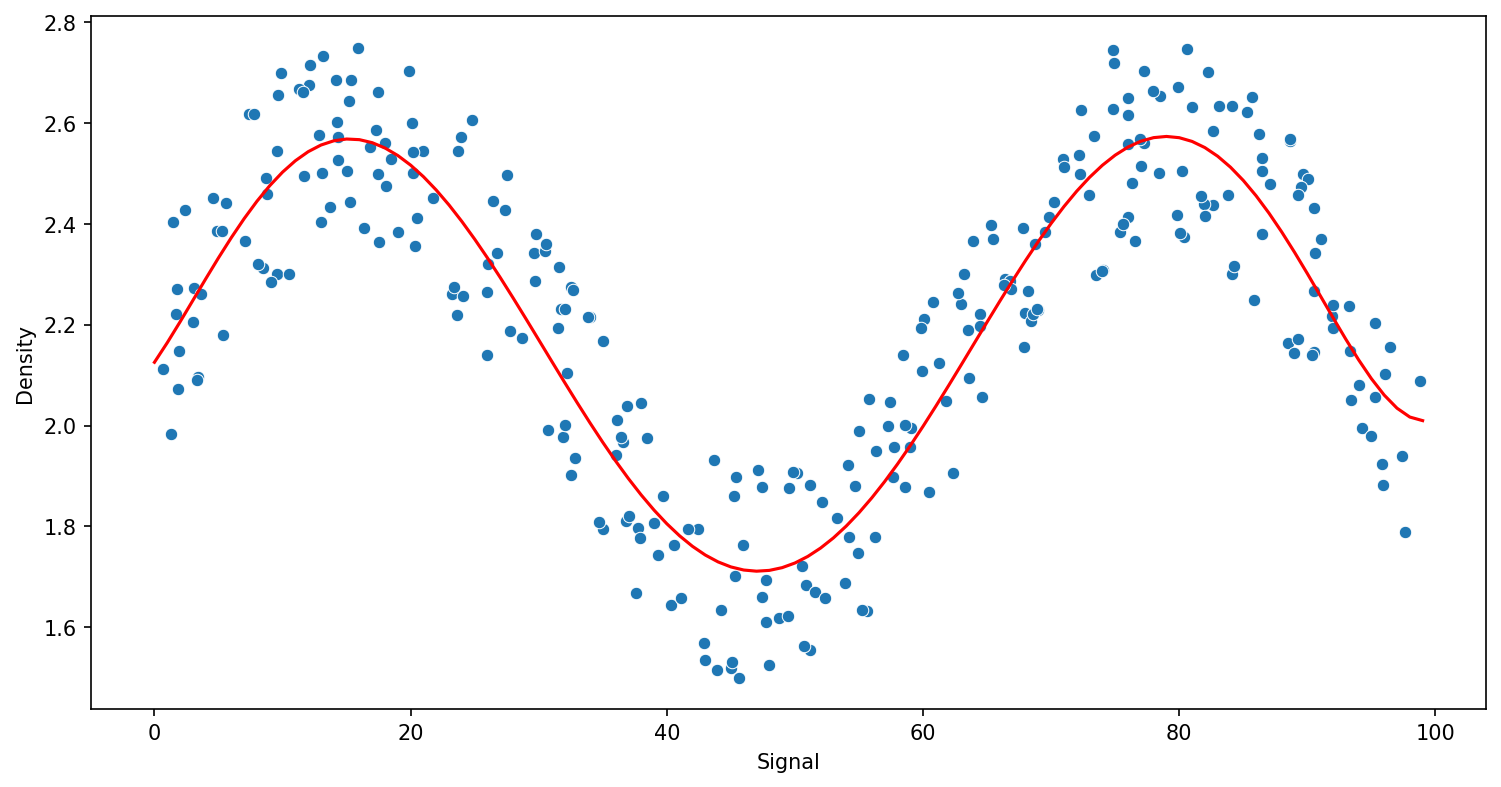

In [25]:
run_model(pipe,X_train,y_train,X_test,y_test)

## KNN Regressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442386
RMSE : 0.15234870286353372
MAE : 0.12198383614100569
RMSE : 0.13730685016923658
MAE : 0.11635971693292668
RMSE : 0.13277855732740923
MAE : 0.13363165935705315
RMSE : 0.15954234753677107


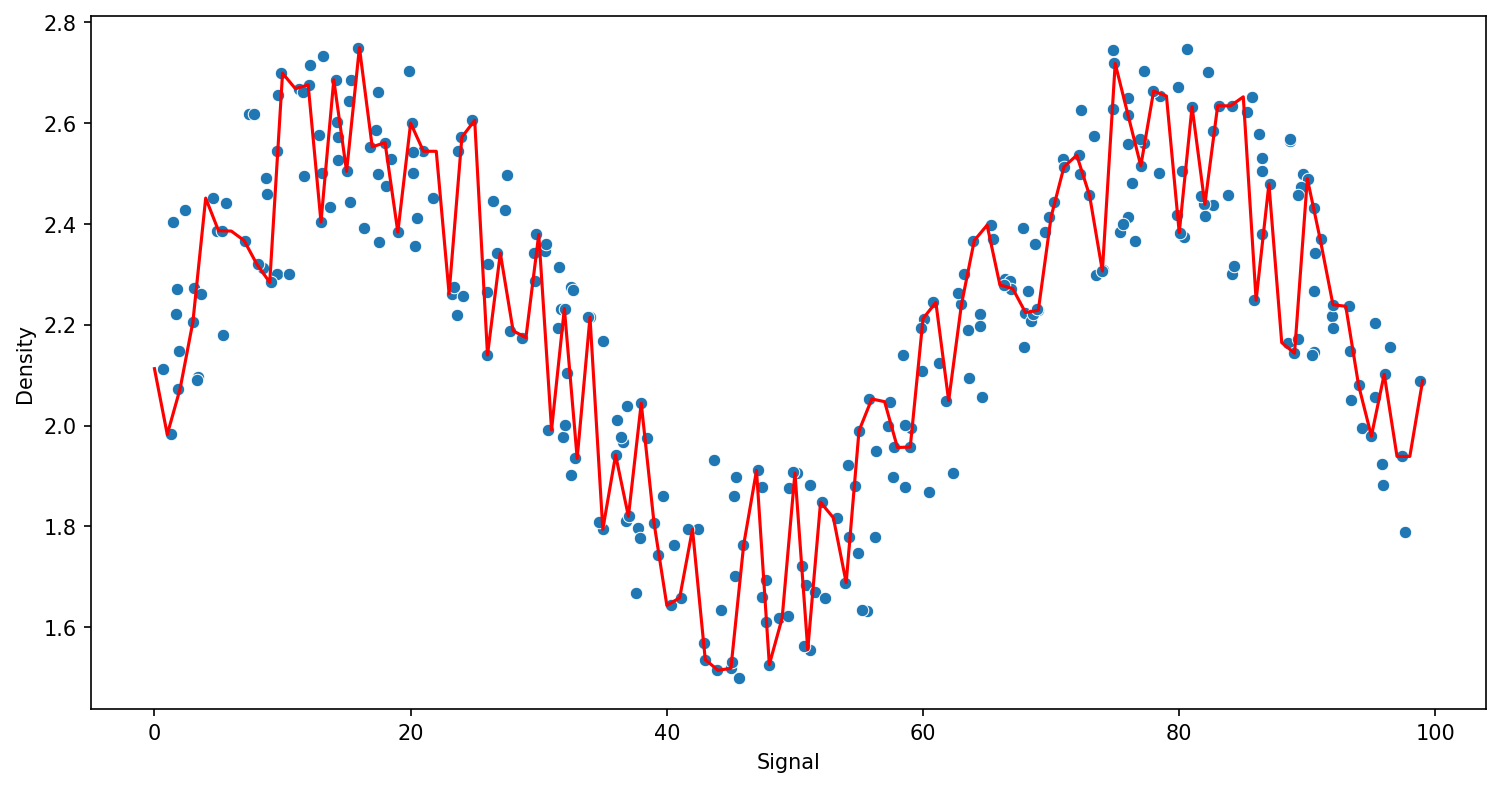

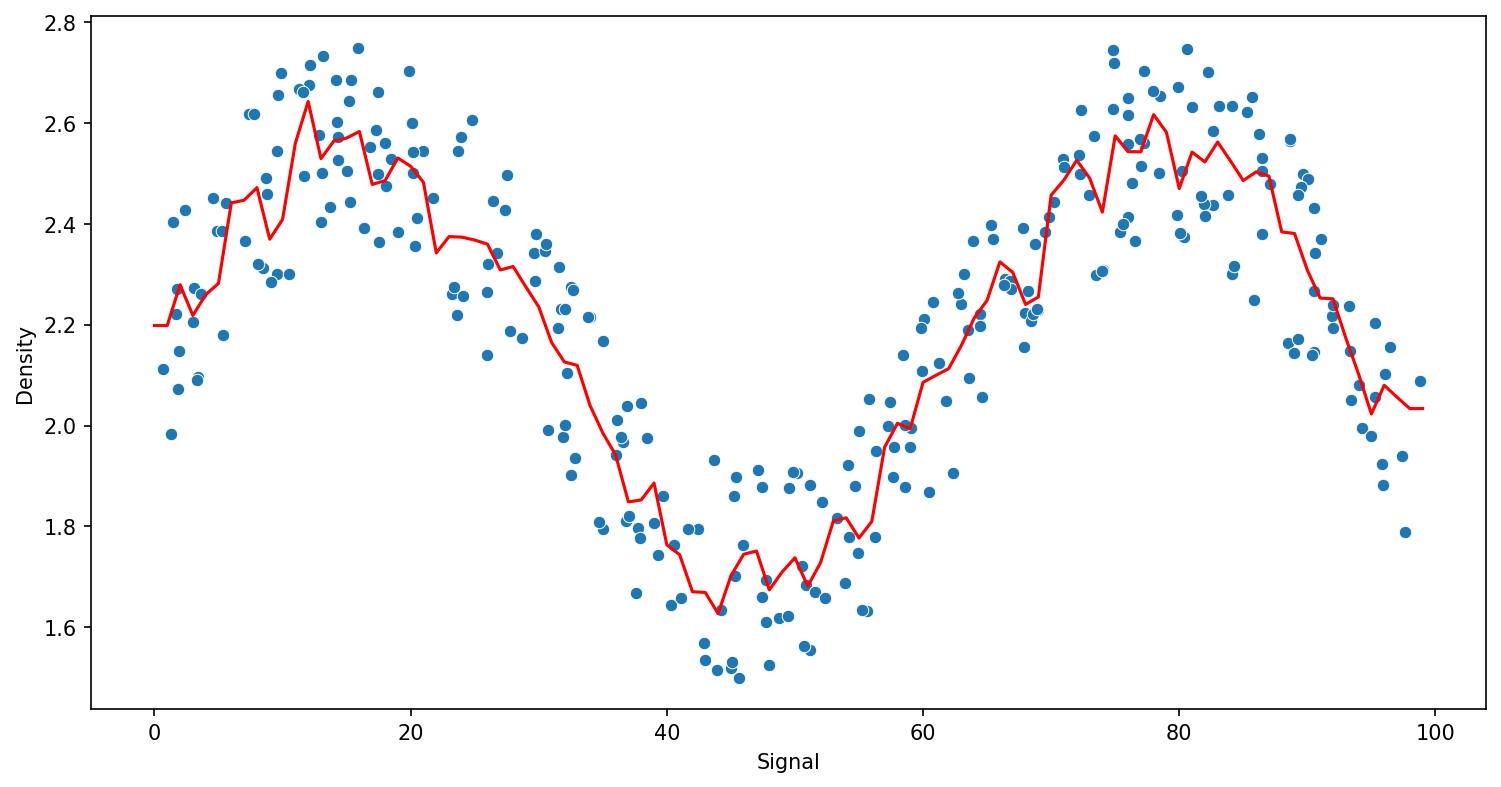

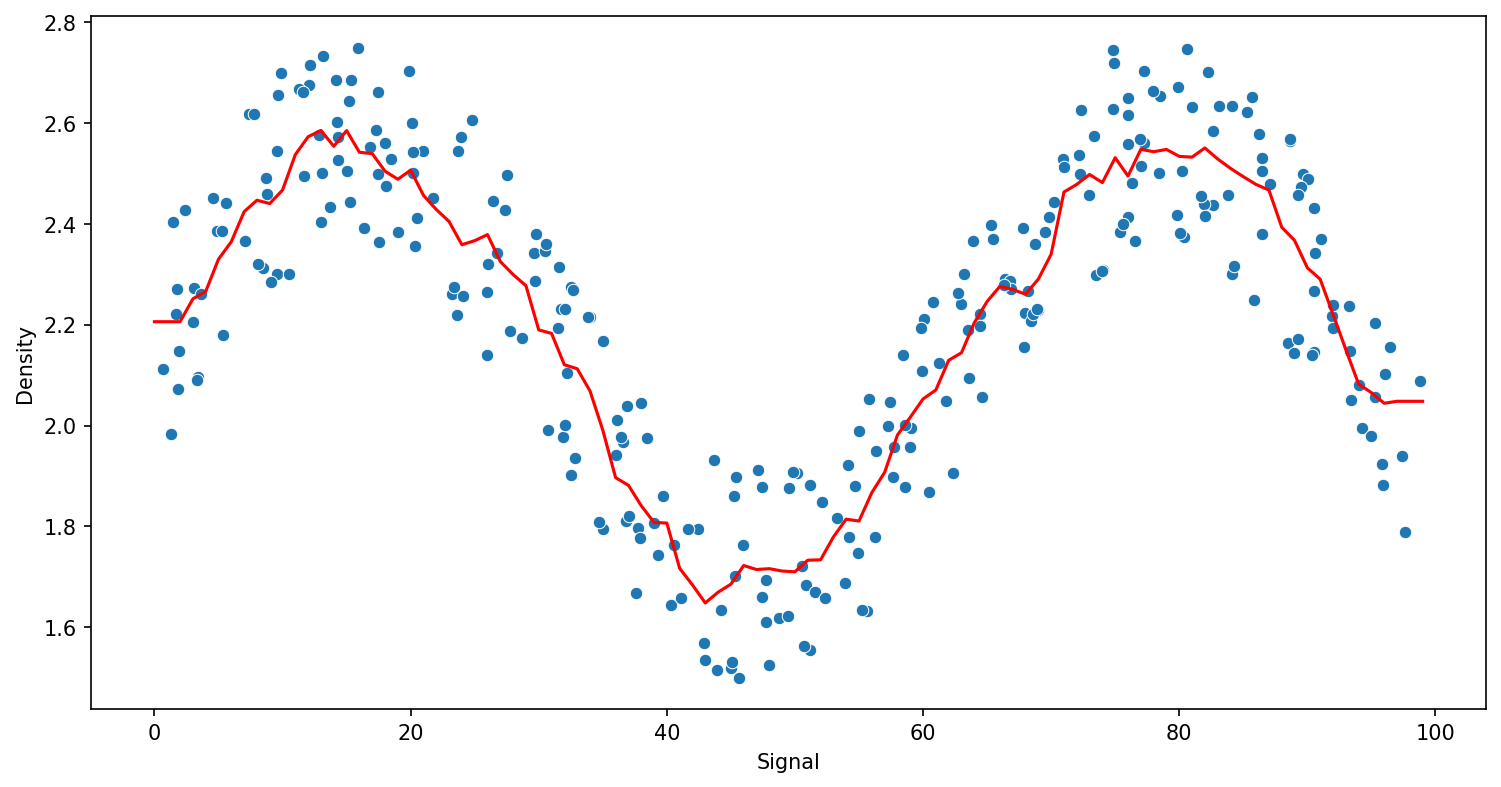

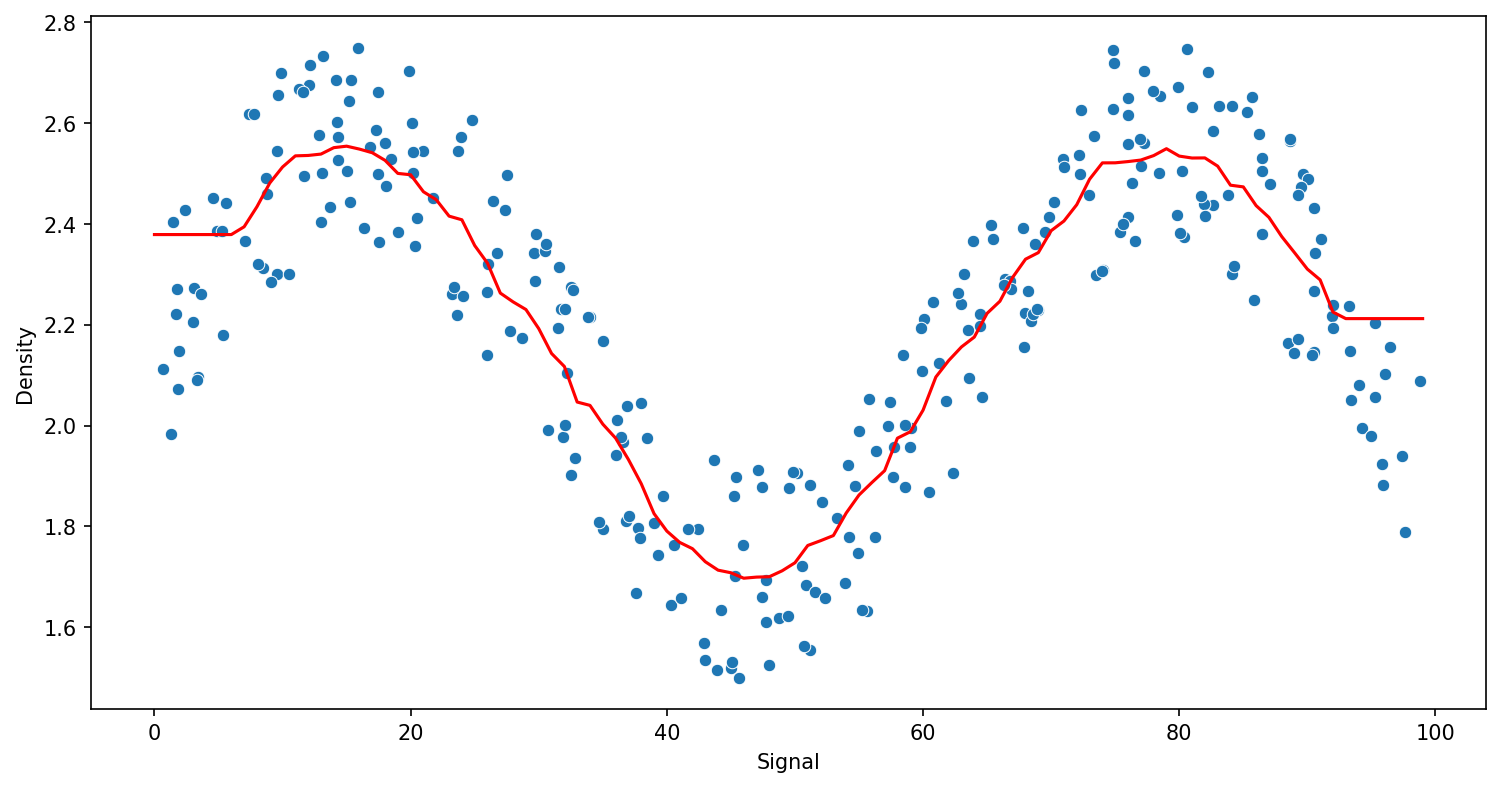

In [27]:
k_values = [1,5,10,30]

for n in k_values:
    
    model = KNeighborsRegressor(n_neighbors=n)
    
    run_model(model, X_train, y_train, X_test, y_test)

## Decision tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442386
RMSE : 0.15234870286353372


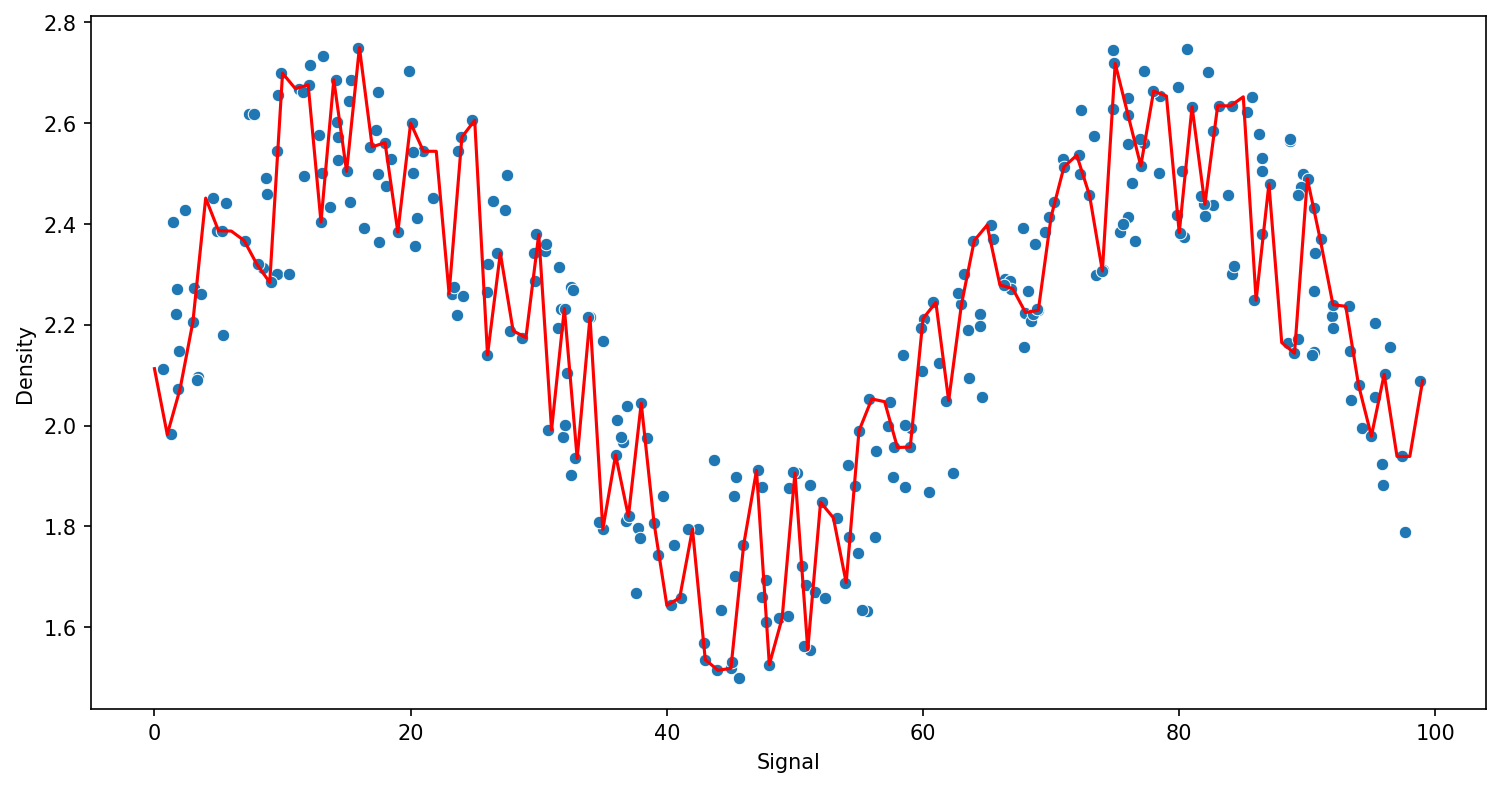

In [29]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

## Support Vector Regression

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.svm import SVR

In [32]:
svr = SVR()
param_grid = {'C':[.001,.01,.1,1,5,10,100,1000],
             'gamma':['auto','scale']
             }

grid = GridSearchCV(svr, param_grid)

MAE : 0.10839555187432501
RMSE : 0.1263507854819897


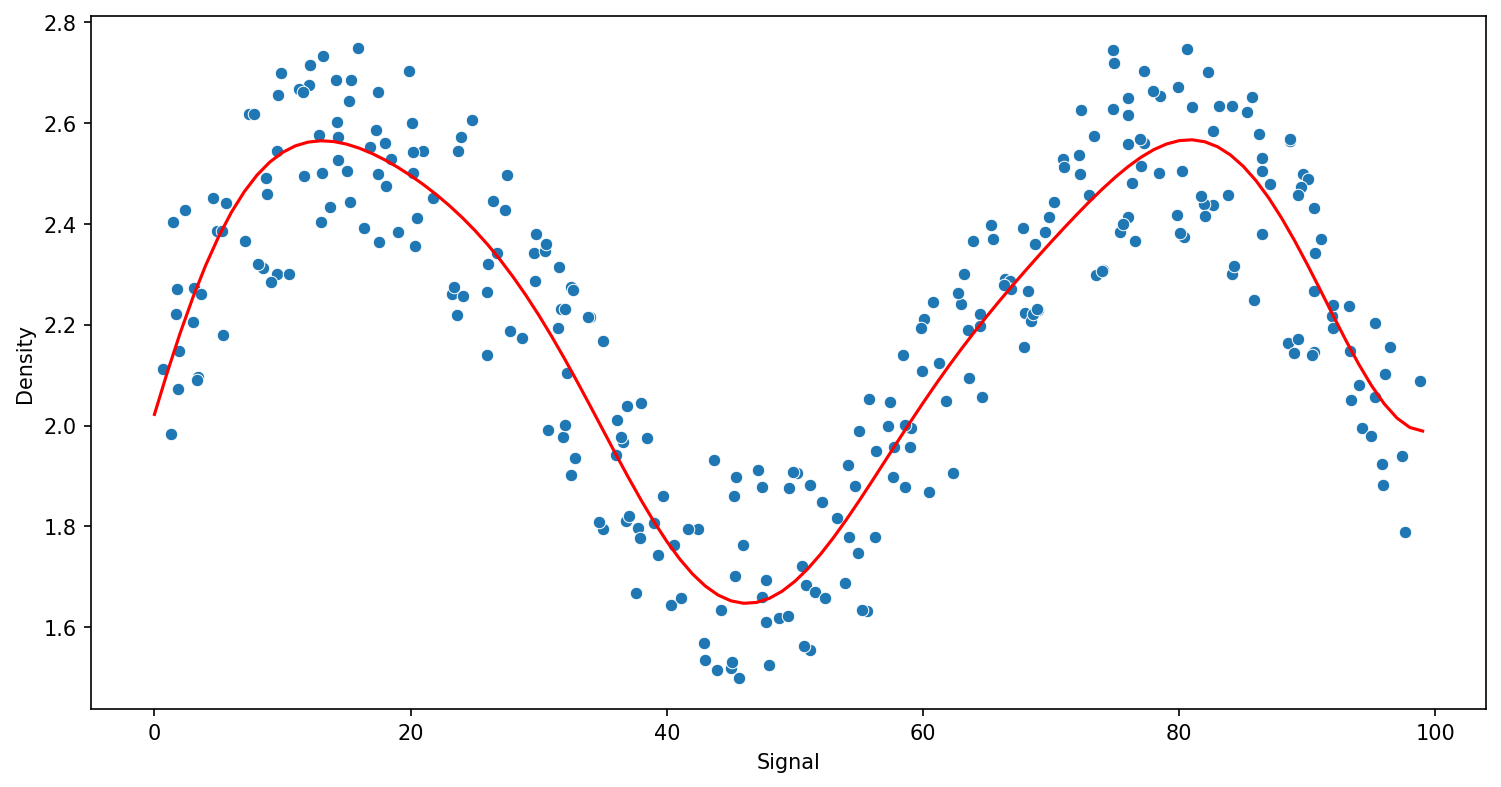

In [33]:
run_model(grid, X_train, y_train, X_test, y_test)

## Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rfr = RandomForestRegressor(n_estimators=10)

MAE : 0.10732277880683339
RMSE : 0.13328155961927995


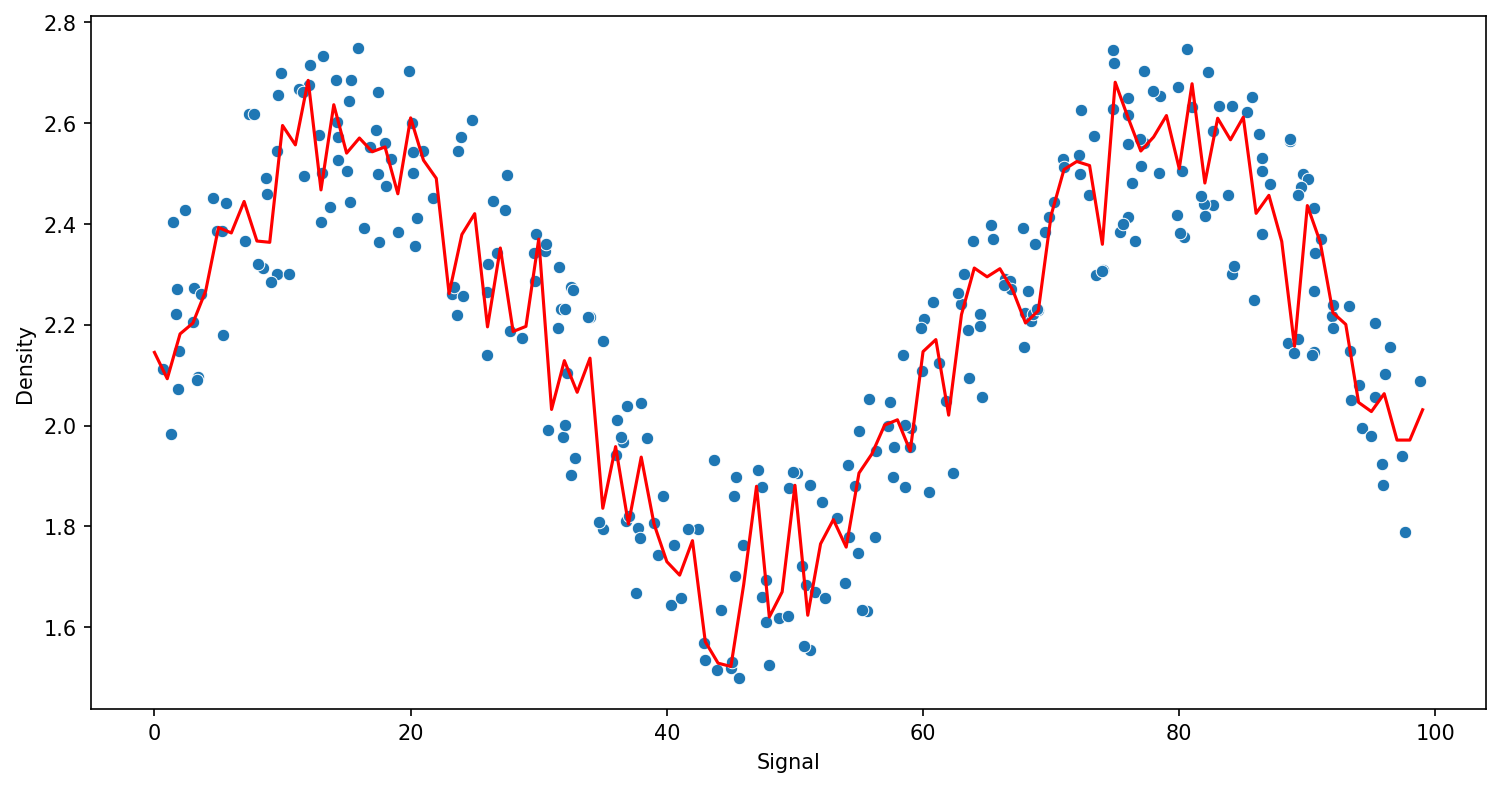

In [36]:
run_model(rfr, X_train, y_train, X_test, y_test)

## Boosted Trees Regression

In [37]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE : 0.11318284854800688
RMSE : 0.13294148649584664


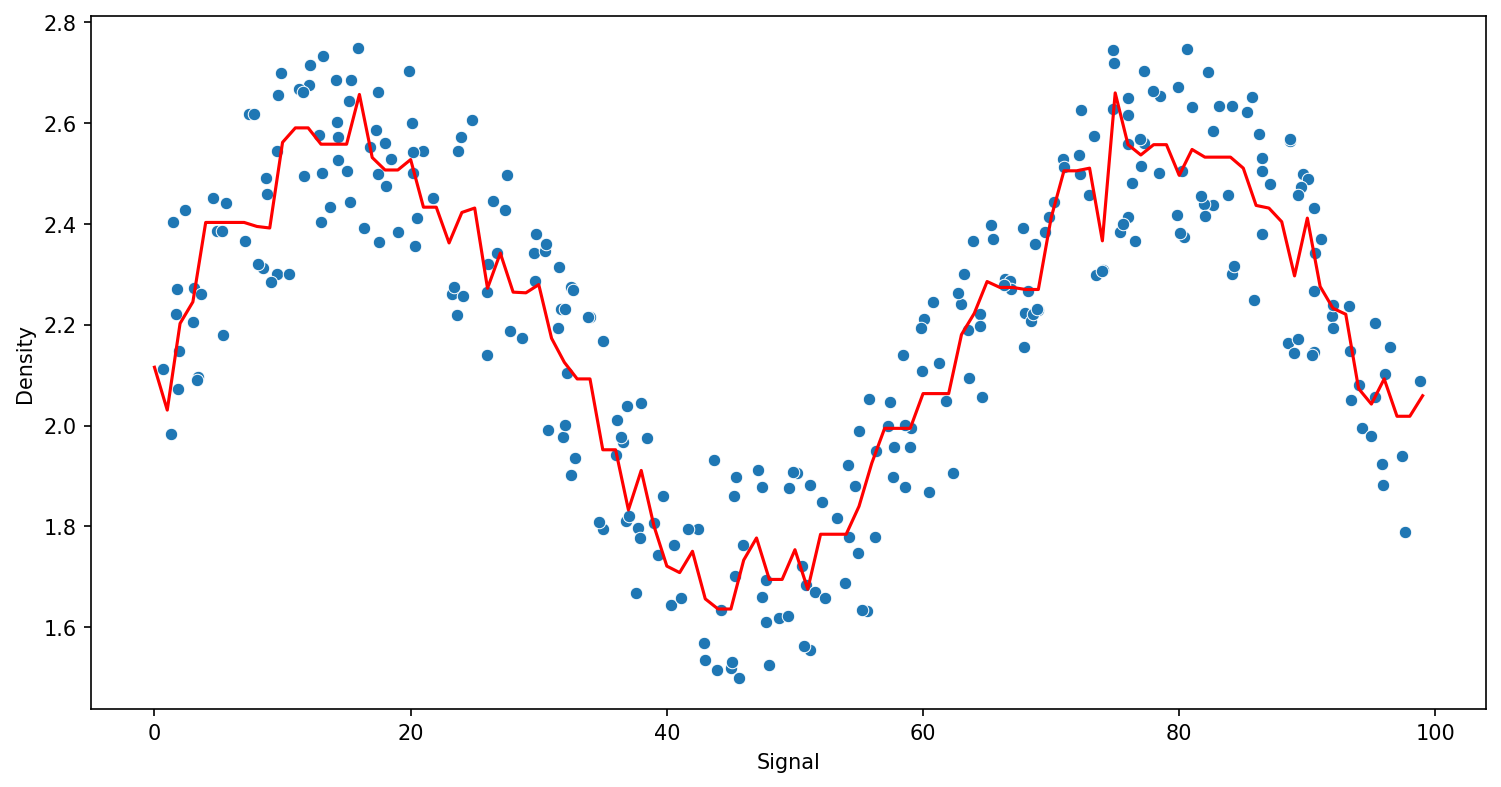

In [38]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

MAE : 0.11425124194901784
RMSE : 0.13278224175617784


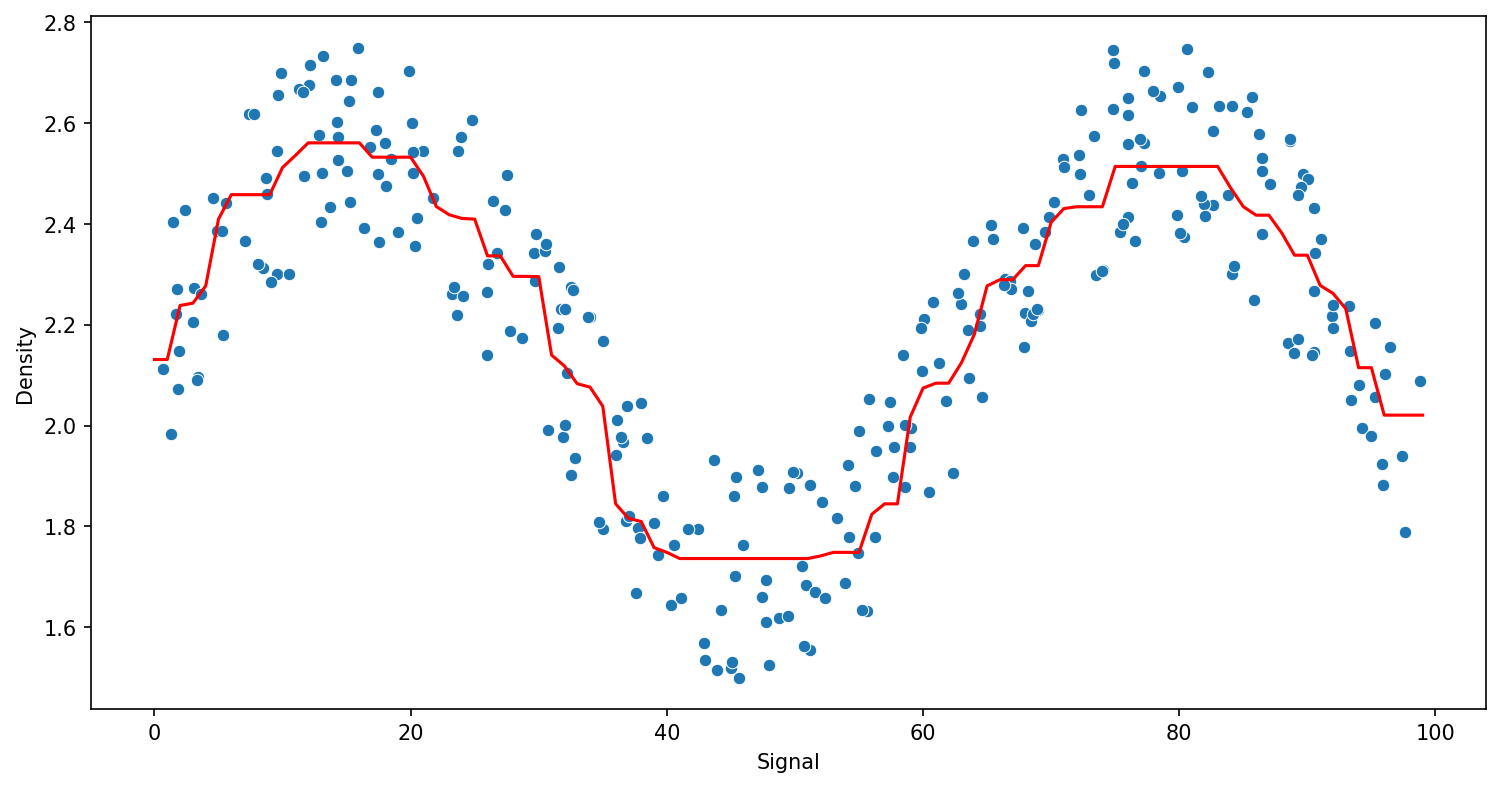

In [39]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)